### Building Predictive Models on Tanzania Water Project using Machine Learning Techniques

## Project Overview 
#### Student Name: Derrick Maling'a
#### Technical Mentor: Maryann Mwikali
#### Cohort: DS PT 11

The Government of Tanzania, through the Ministry of Water and Sanitation, is implementing various water projects across the country to address the ongoing water scarcity affecting both urban and rural communities. The Ministry has secured funding to install water pumps in different constituencies nationwide.
This project aims to examine and analyze relevant data, build predictive models, and present insights along with actionable recommendations focusing on three categories of water pumps:
1. Functional Waterpoints-the water point is operational and there are no repairs needed
2. Functional but in Need of Repair – water points that are working but require maintenance
3. Non-Functional – water points that are not operating at all

The project’s findings will support the Ministry and related agencies in making informed, data-driven decisions.

## Business Understanding

Our goal is to predict which water pumps are likely to be faulty in order to enhance access to clean, potable water throughout Tanzania.
To achieve this, we will develop predictive models that classify water points into the following categories:
1. Predict Fully Functional Water Points
2. Predict Functional Water Points that Require Repair
3. Predict Non Functional Waterpoints

## Data Understanding

In this project, we will use data from Taarifa, an open-source platform that aggregates information from the Tanzania Ministry of Water. The dataset is in .csv format and contains three key attributes relevant to water point functionality.
1. Test Set Values-Independent variables that need predictions
2. Training set labels- Dependent variable for each of the rows in Training set values
3. Training set values- Independent variables for the training set

## Data Preparation

In [1]:
%pip install imbalanced-learn

#import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Load Test Set Values data set
Tst_set_vals = pd. read_csv("Test Set Values.csv") # Update path as needed

#Load Training Set Labels data set
Train_set_label = pd. read_csv('Training Set Labels.csv')

#Load Training Set Values data set
Train_set_vals = pd. read_csv('Training Set Values.csv')

## Data cleaning 

#### Data cleaning will involve dropping irrelevant columns, checking for duplicates and missing values and taking necessary action. We also convert datatypes where necessary.

In [3]:
# checking Data Frames
Tst_set_vals.head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
5,52449,0.0,2013-03-04,Government Of Tanzania,1685,DWE,36.685279,-3.302420,Masaga,0,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
6,24806,0.0,2011-03-02,Government Of Tanzania,550,Gover,36.398041,-7.541382,none,0,...,never pay,salty,salty,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
7,28965,0.0,2013-01-25,Finw,234,FinW,39.607420,-10.893786,Kwa Mkwaa,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
8,36301,30.0,2013-01-23,Unicef,584,LGA,39.262951,-10.823588,Kwa Mzee Mpini,0,...,per bucket,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
9,54122,0.0,2013-03-18,Lawatefuka Water Supply,1083,Lawatefuka water sup,37.096108,-3.251754,Kwa Flora Daud,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [4]:
Tst_set_vals.info() #Detailed information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13980 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [5]:
#chech for missing values
Tst_set_vals.isna().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                    870
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7242
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

In [7]:
# Check data frame
Train_set_vals.head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,...,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,...,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [8]:
# Check for duplicate rows
Train_set_vals.duplicated().sum()

0

In [9]:
# Check for missing values
Train_set_vals.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [11]:
# Drop irrelevant columns
Train_set_vals.drop(columns=['funder', 'installer', 'subvillage', 'public_meeting', 'scheme_management', 'scheme_name', 'permit'],axis=1, inplace=True)

In [12]:
Train_set_vals.info() #7 columns dropped from the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   longitude              59400 non-null  float64
 5   latitude               59400 non-null  float64
 6   wpt_name               59398 non-null  object 
 7   num_private            59400 non-null  int64  
 8   basin                  59400 non-null  object 
 9   region                 59400 non-null  object 
 10  region_code            59400 non-null  int64  
 11  district_code          59400 non-null  int64  
 12  lga                    59400 non-null  object 
 13  ward                   59400 non-null  object 
 14  population             59400 non-null  int64  
 15  re

# Explatory Data Analysis

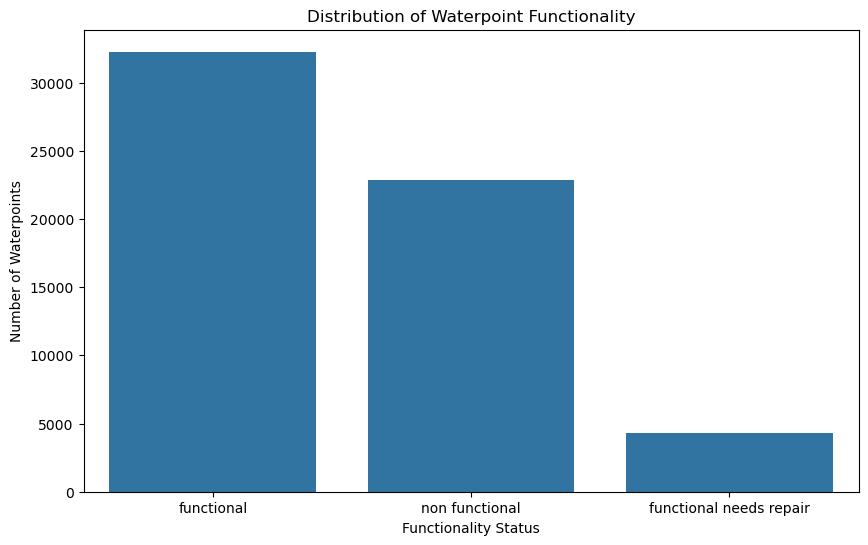

In [18]:
# Check the Waterpump vs its Functionality
# Plot the relationship between waterpump and functionality

# Merge Train_set_vals and Train_set_label on 'id' to get status_group for each waterpoint
merged_df = Train_set_vals.merge(Train_set_label, on='id')

# Plot the count of waterpoints by functionality
plt.figure(figsize=(10,6))
sns.countplot(data=merged_df, x='status_group')
plt.title('Distribution of Waterpoint Functionality')
plt.xlabel('Functionality Status')
plt.ylabel('Number of Waterpoints')
plt.show()


### The dataset reveals that the majority of water pumps in Tanzania are operational. Specifically:

1. Functional water pumps: Approximately 40,000
2. Non-functional water pumps: Around 22,000
3. Functional but need repair: Fewer than 5,000

This distribution highlights a strong presence of working infrastructure, but also points to critical maintenance and repair needs in certain areas.

## Modelling
### Creating a Model that predicts Functional waterpumps from Training set values

In [19]:
#create a predictive model that predicts functional water pumps

# Use already loaded dataframes
X = Train_set_vals
y = Train_set_label

# Merge on 'id'
df = X.merge(y, on='id')

In [20]:
# Encode categorical variables
categorical_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Define features and target
X = df.drop(['status_group', 'id'], axis=1)
y = df['status_group']

In [21]:
#train/test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [22]:
# You can use RandomForest, XGBoost, etc.
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluation

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8098484848484848
[[5760  172  520]
 [ 437  282  144]
 [ 919   67 3579]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      6452
           1       0.54      0.33      0.41       863
           2       0.84      0.78      0.81      4565

    accuracy                           0.81     11880
   macro avg       0.73      0.67      0.69     11880
weighted avg       0.80      0.81      0.80     11880



##### Our final model, built using a Random Forest Classifier, achieved an overall accuracy of 81% in predicting the functionality status of water pumps across Tanzania.

| Label | Meaning                 | F1-Score | Comments                                  |
| ----- | ----------------------- | -------- | ----------------------------------------- |
| 0     | Functional              | 0.85     | High precision & recall                   |
| 1     | Functional needs repair | 0.41     | 🚨 Low recall (33%) → often misclassified |
| 2     | Non-functional          | 0.81     | Balanced, good performance                |


### There is class imbalance on Functional water pumps that needs repair category

In [24]:
#Handling class imbalance

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
model.fit(X_res, y_res)

#print

RandomForestClassifier(random_state=42)

## **Conclusion**

### **Business Conclusions from the Model**

### 1. **Overall Model Performance**

* The Random Forest model predicts the functional status of water pumps with approximately 81% accuracy.
* It performs strongly in identifying functional and non-functional pumps.
* However, it has difficulty detecting pumps that are “functional but need repair”, a challenge often encountered even in field assessments due to subtle or infrequent failure signs.

### 2. **State of the Water Infrastructure**

* Based on the dataset and predictions, a significant number of pumps are either non-functional or require maintenance.
* The model uncovers key patterns in pump failure, linked to factors such as age, installation method, location, water quality, and management structure.

### 3. **Identified Risk Indicators**

* Features like construction year, region, installer name, and management type emerged as strong predictors of pump failure.
* Pumps that are older, poorly managed, or installed by unidentified parties are statistically more prone to malfunction.


## **Business Recommendations**

### 1.**Proactive Maintenance Strategy**

* Leverage model predictions to dispatch maintenance teams to high-risk areas before pumps break down.
* This predictive approach can significantly reduce downtime and cut repair costs over time.

### 2.**Smarter Budget Allocation**

* Use model insights to direct resources and funds to regions or pump types with higher predicted failure rates.
* For instance, if hand pumps installed before 2000 in Region X frequently fail, prioritize those for replacement or upgrade.

### 3.**Standardization and Installation Oversight**

* Mandate certified installers and enforce installation quality standards, as these directly influence pump longevity.
* Introduce digital tracking for all new installations to monitor performance over time and refine predictions.

### 4.**Enhanced Data Collection**

* The model’s lower performance on the “needs repair” category highlights the need for improved ground data.
* Train field officers to better classify pump conditions and consider deploying mobile tools or IoT sensors for real-time data capture.

### 5.**Community-Driven Monitoring**

* Involve local communities in reporting and maintaining water infrastructure.
* Promote community-managed schemes if shown by the model to correlate with better pump performance.

### 6.**Visualization and Decision Support**

* Develop a GIS-based dashboard that maps pump status predictions.
* Government agencies, NGOs, and donors can use this to make targeted, data-informed decisions to improve rural water access.

## 📈 Metrics for Monitoring Success

* % of predicted “needs repair” pumps that fail within 3 months (real-world validation of the model).
* Reduction in average pump downtime in regions using predictive maintenance vs. traditional reactive approaches.
* Decrease in operational cost per functioning pump post model adoption.